## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_19-25-05-23.csv', firstRow=516, lastRow=522)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_230523_S517-522.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=54s and ended at t=484s; mass=45.2252g
This equals a volume of 45.316m; expected was 45.412mL; error is 0.212%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0010000000000000002 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


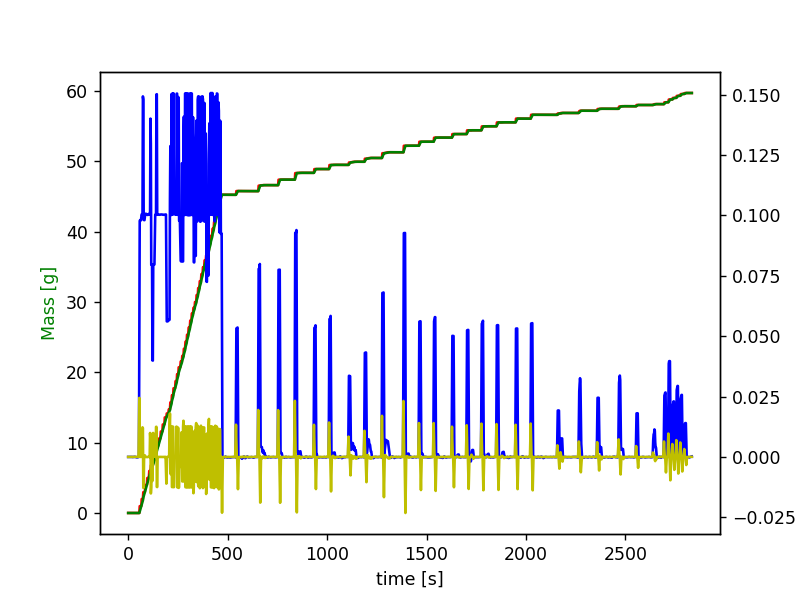

Addition of 0.534g Texapon SB 3 KC detected from 538s to 558s - expected volume = 0.91mL and actual volume = 0.482mL (resulting error is 47.054%)
Addition of 0.856g Plantacare 2000 detected from 650s to 692s - expected volume = 0.957mL and actual volume = 0.79mL (resulting error is 17.403%)
Addition of 0.79g Dehyton MC detected from 750s to 780s - expected volume = 0.785mL and actual volume = 0.729mL (resulting error is 7.18%)
Addition of 0.971g Dehyton MC detected from 834s to 874s - expected volume = 0.85mL and actual volume = 0.892mL (resulting error is 4.973%)
Addition of 0.546g Dehyton PK 45 detected from 930s to 954s - expected volume = 0.542mL and actual volume = 0.52mL (resulting error is 4.112%)
Addition of 0.599g Dehyton PK 45 detected from 1006s to 1046s - expected volume = 0.542mL and actual volume = 0.571mL (resulting error is 5.272%)
Addition of 0.448g Dehyton ML detected from 1104s to 1152s - expected volume = 0.529mL and actual volume = 0.413mL (resulting error is 21.91

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.0003125 g/s^2


<IPython.core.display.Javascript object>


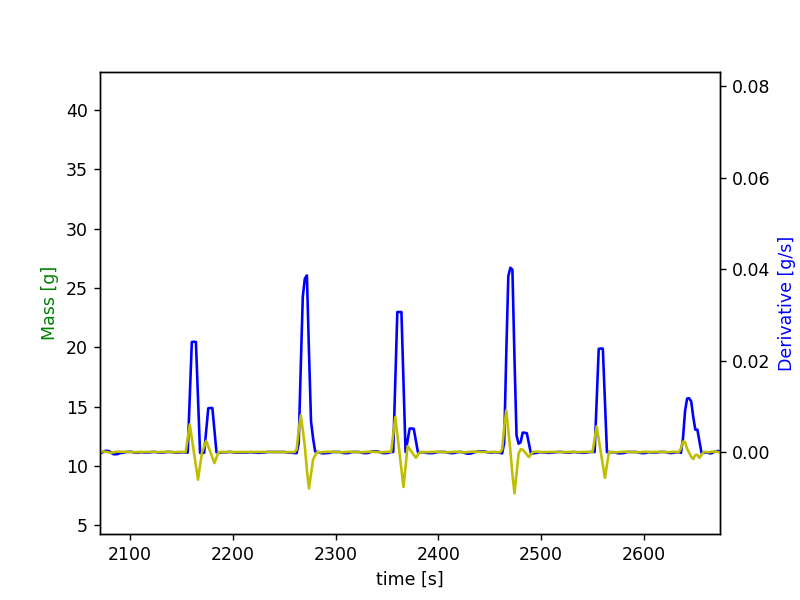

Addition of 0.266g Dehyquart CC6 detected from 2154s to 2188s - expected volume = 0.26mL and actual volume = 0.254mL (resulting error is 2.068%)
Addition of 0.324g Dehyquart CC6 detected from 2260s to 2284s - expected volume = 0.22mL and actual volume = 0.304mL (resulting error is 37.979%)
Addition of 0.285g Dehyquart CC6 detected from 2354s to 2384s - expected volume = 0.247mL and actual volume = 0.27mL (resulting error is 9.291%)
Addition of 0.366g Dehyquart CC6 detected from 2460s to 2494s - expected volume = 0.278mL and actual volume = 0.346mL (resulting error is 24.617%)
Addition of 0.18g Dehyquart CC6 detected from 2550s to 2568s - expected volume = 0.102mL and actual volume = 0.169mL (resulting error is 65.482%)
Addition of 0.131g Dehyquart CC6 detected from 2634s to 2660s - expected volume = 0.117mL and actual volume = 0.123mL (resulting error is 5.444%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


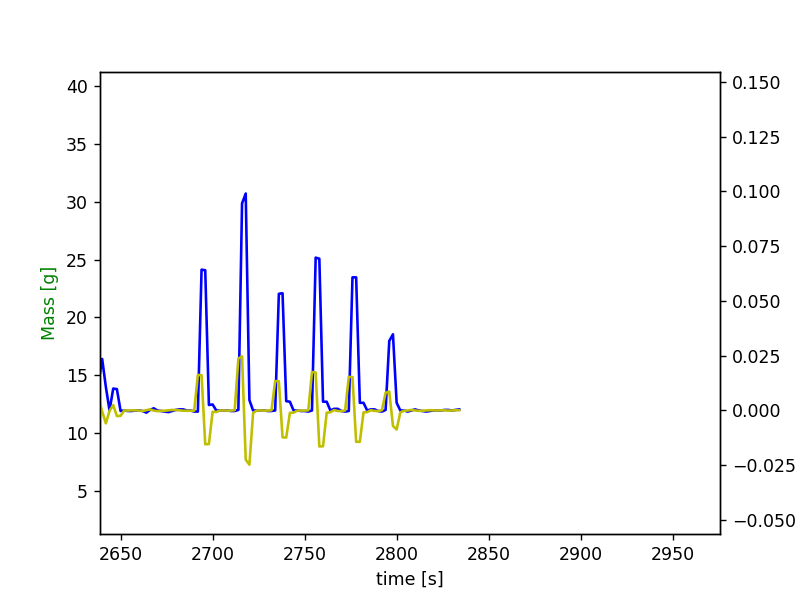

Addition of 0.265g Arlypon F detected from 2690s to 2702s - expected volume = 0.297mL and actual volume = 0.304mL (resulting error is 2.317%)
Addition of 0.396g Arlypon F detected from 2712s to 2726s - expected volume = 0.426mL and actual volume = 0.446mL (resulting error is 4.762%)
Addition of 0.229g Arlypon F detected from 2732s to 2746s - expected volume = 0.236mL and actual volume = 0.261mL (resulting error is 10.628%)
Addition of 0.293g Arlypon F detected from 2752s to 2764s - expected volume = 0.311mL and actual volume = 0.332mL (resulting error is 6.752%)
Addition of 0.255g Arlypon F detected from 2772s to 2784s - expected volume = 0.268mL and actual volume = 0.288mL (resulting error is 7.595%)
Addition of 0.139g Arlypon F detected from 2792s to 2804s - expected volume = 0.143mL and actual volume = 0.158mL (resulting error is 10.317%)


In [5]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2780,2834,2844,2848,2862,2884,2906])

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_230523_S517-S522.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_20120\2541520428.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
516,517.0,5.610533,0.0,0.0,0.0,8.995564,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.800273,0.0,0.0,2.785818,0.0
517,518.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,9.901661,0.000000,0.0,0.000000,10.885602,0.0,3.255540,0.0,0.0,3.975925,0.0
518,519.0,0.000000,0.0,0.0,0.0,0.000000,7.812014,11.319954,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.821088,0.0,0.0,2.264782,0.0
519,520.0,0.000000,0.0,0.0,0.0,0.000000,9.488606,0.000000,0.000000,9.186651,0.0,0.000000,0.000000,0.0,3.580214,0.0,0.0,2.858308,0.0
520,521.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,11.423066,0.0,10.242149,0.000000,0.0,1.772113,0.0,0.0,2.505274,0.0
521,522.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,8.060212,0.000000,0.0,11.277565,0.000000,0.0,1.294366,0.0,0.0,1.376037,0.0
